In [1]:

!pip install easyocr

In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
IMAGE_PATH = 'Image/7.jpg'

In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

/home/bekzat/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[177, 89], [828, 89], [828, 155], [177, 155]],
  'C++ showed that it was possible to implement',
  0.014651676639914513),
 ([[335, 127], [499, 127], [499, 171], [335, 171]],
  'ofOOP in',
  0.15127640962600708),
 ([[503, 139], [743, 139], [743, 181], [503, 181]],
  'g manner that is',
  0.04277758300304413),
 ([[270, 173], [419, 173], [419, 216], [270, 216]],
  'allocation',
  0.9637723565101624),
 ([[433, 173], [497, 173], [497, 209], [433, 209]],
  'andl',
  0.4192236661911011),
 ([[507, 170], [724, 170], [724, 230], [507, 230]],
  'type checking',
  0.3641550838947296),
 ([[744, 152], [952, 152], [952, 202], [744, 202]],
  'consistent with',
  0.6419032216072083),
 ([[733, 191], [871, 191], [871, 232], [733, 232]],
  'and with',
  0.49691522121429443),
 ([[176, 208], [953, 208], [953, 273], [176, 273]],
  'overhead for dispatching; the dynamic requirementseof',
  0.0043225372210145),
 ([[253, 253], [607, 253], [607, 295], [253, 295]],
  'are used onlyas needed.',
  0.111977100372

In [6]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

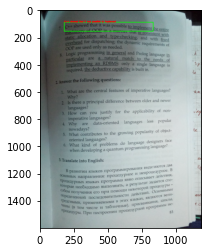

In [7]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [8]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.7,(255,0,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

TypeError: function takes exactly 4 arguments (2 given)

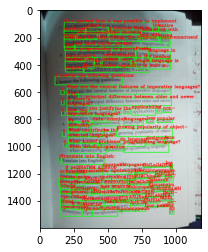

In [9]:
img = cv2.imread(IMAGE_PATH)
for detection in result: 
    top_left = tuple(int(val) for val in detection[0][0])
    bottom_right = tuple(int(val) for val in detection[0][2])
    text = detection[1]
    font = cv2.FONT_HERSHEY_COMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,top_left, font, 1,(255,0,0),2,cv2.LINE_AA)
    
plt.imshow(img)
plt.show()